In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
ann_data = pd.read_csv("Churn_Modelling.csv")
ann_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
ann_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


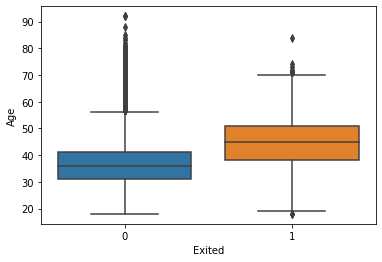

In [8]:
#visualization using boxplot
sns.boxplot(x="Exited", y="Age", data=ann_data) #boxplot

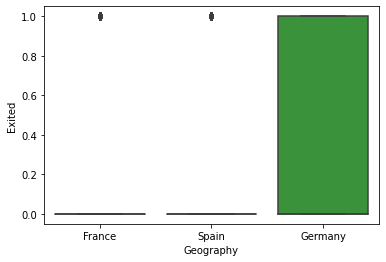

In [9]:
sns.boxplot(x="Geography", y="Exited", data=ann_data) #Bargraph

In [10]:
# using one hot encoding
ann1 = pd.get_dummies(ann_data) #encoding the data

In [11]:
#Input and output variable
X = ann1.iloc[:, 3:13].values
y = ann1.iloc[:, 13].values
X, y
#Spliting the data using scikitlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
# Building the ANN
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200
800/800 [==============================] - 2s 1ms/step - loss: 0.0419 - accuracy: 0.9949
Epoch 2/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0118 - accuracy: 0.9995
Epoch 3/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0151 - accuracy: 0.9995
Epoch 4/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0071 - accuracy: 0.9995
Epoch 5/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0114 - accuracy: 0.9995
Epoch 6/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0066 - accuracy: 0.9995
Epoch 7/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0065 - accuracy: 0.9995
Epoch 8/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 0.9995
Epoch 9/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0049 - accuracy: 0.9995
Epoch 10/200
800/800 [==============================] - 1s 1ms/step - loss: 0.0067 - accura

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

